In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# Quantum Marriage Proposal

[Quantum computing](https://en.wikipedia.org/wiki/Quantum_computing) is very different from the classical computing we are all used to. I realized that the day I decided to learn the basics of this amazing field and write a simple `Hello World!` program. It is not just about printing a string on the screen, but about using the properties of [Quantum Mechanics](https://en.wikipedia.org/wiki/Quantum_mechanics) to solve a particular problem. I needed to come up with creative problem to solve! 

**I found one:**

Months ago I proposed to my girlfriend Mari. Like in the quantum world of atoms and electrons, Mari was in a superposition state, a equal-weighted combination of two states: **"Yes"** and **"No"**. 

Then, one day I had the courage to *measure* the state. This step forced the reveal of the final state.

Yes, a proposal as a quantum problem.

## Defining the answers:

As explained before there are two possible answers. To represent those I am going to use the binary representation of characters **Y** and **N**. 

They are 8 `bits` long. As shown below, the `bits` in position 0, 1, 2 and 4 are exchanged. Only 4 `bits` that, depending on their values, could make the proposal day the best or the worst of my life. Pretty scary if you think about it.

In [2]:
print(bin(ord('Y')))
print(bin(ord('N')))

0b1011001
0b1001110


## Preparing the Quantum Circuit:

To represent and solve this problem I need:

- 8 `qubits`.
- 8 classical `bits`.

The classical [bits](https://en.wikipedia.org/wiki/Bit) will be used to store the results of the measurement of each individual [qubit](https://en.wikipedia.org/wiki/Qubit).

In order to put together the `qubits`, `bits` and gates I will also need a `Quantum Circuit`. This circuit will be used to collect the answer to our question.

To make the concept clear, here is a representation of `Quantum Circuit` with 1 `qubit` and 1 classical `bit`.

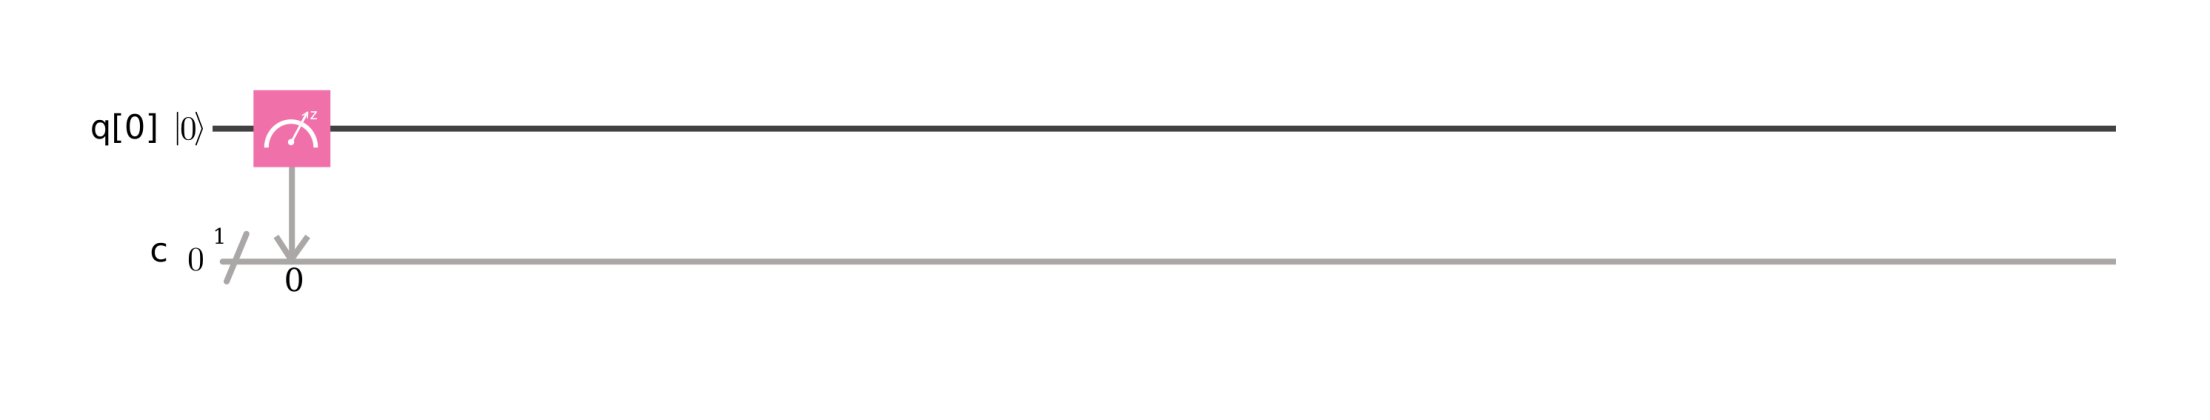

In [11]:
Image(filename = "./quantum_circuit.png")

In [4]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer

# 8 Qubits
q = QuantumRegister(8)

# 8 Classical bits
c = ClassicalRegister(8)

# 1 Quantum Circuit
qc = QuantumCircuit(q, c)

## Preparing the initial state of the qubits:

By default `qubits` start with a value of 0, that corresponds to the lowest the lowest energy state. So, the `qubit`
representation is `00000000`. In order to change it to the binary value of **Y**, that is `01011001`, I would need to *bit-flip* the `bits` in position 0, 3, 4 and 6. This is done with a `X Gate`, that in classic computing is represented by a `NOT` gate.

In [5]:
qc.x(q[0])
qc.x(q[3])
qc.x(q[4])
qc.x(q[6])

# The current representation is:
print("01011001")

01011001


## The negative answer

Right now I have prepared the initial state of our 8 `qubits` to represent the character **Y**. This is cheating! If I measure the final of each `qubit` I will always get an affirmative answer to my question. So I need to add the second terrible option. I need to really know what is the answer, and it could also be **N**. 

As I explained before, the difference between the two answers are only in the positions 0, 1, 2 and 4:

`Y:` 01011001

`N:` 010**0**1**110**

I need the `qubits` in the same position [*entangled*](https://en.wikipedia.org/wiki/Quantum_entanglement) so they can produce both values.

## Entanglement and Superposition:

**Entanglement** is a pretty amazing quantum phenomena. Two or more quantum objects need to be described as a whole instead of independently when separated by a large enough distance to influence one another, they still behave individually random but also too strongly correlated.

In other words, when I entangle two `qubits`, measuring one of them will behave randomly. But this random behaviour  will allow to predict how the other `qubit` will behave.

Yes, difficult to understand and even more difficult to explain. 

So let's go step by step.

First I will need a `qubit` that behaves randomly. This can be done by creating a [superposition](https://en.wikipedia.org/wiki/Quantum_superposition). In a superposition state, the `qubit` is neither 0 or 1, but a  combination of these two states. In other words, when I read its final state the output will be random. To put a `qubit` in superposition state I will use a **H** gate:

In [6]:
qc.h(q[1])

Now that the `qubit` 1 is in superposition, I can entangle it with the one in position 2.

This is done with a **Controlled-NOT gate**. This gate connect two `qubits`, the **control** and the **target** one. 

If the value of the control `qubit` is 1, then the target will flip its value. 

For example, let's say that I have two pairs of `qubits`. The one in the first position is the control and the one in the second position is the target. This would be the result of applying a Controlled-NOT gate.

```
00 C-NOT=> 00
01 C-NOT=> 01
10 C-NOT=> 11
11 C-NOT=> 10
```

So basically now I need to entangle the remaining bits the output can produce **Y** and **N**.

In [7]:
qc.cx(q[1],q[2])
qc.cx(q[2],q[0])
qc.cx(q[0],q[4])

Now I have a `qubit` that is random, but correlated to others thanks to the entanglement between them. By measuring the random final stage I can predict the value of the other `qubits`.

## Asking the question:

Let's measure the final stage from the Quantum Circuit, or using other words, **let's ask the question!** Not once, but many times. 

The different answers will be measured by their probabilities:


In [63]:
for j in range(8):
    qc.measure(q[j], c[j])
    
job_sim = execute(qc, "local_qasm_simulator")
sim_result = job_sim.result()
result = sim_result.get_counts(qc)



{'Yes': 509, 'No': 515}


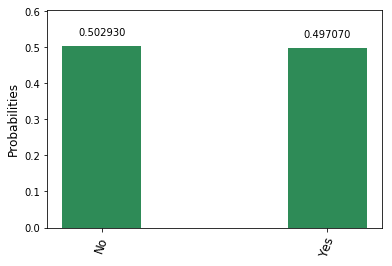

In [64]:
result["Yes"] = result.pop('01001001')
result["No"] = result.pop('01011110')
print(result)
plot_histogram(result)

Most of you are thinking that this is not very clear answer answer, but in the Quantum world it actually is!

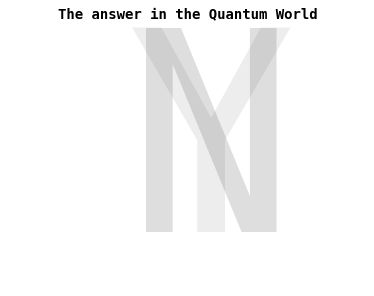

In [94]:
import matplotlib.pyplot as plt
plt.rc('font', family='monospace')

fig = plt.figure()
fig.suptitle('The answer in the Quantum World', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
plt.axis('off')

ay = result["Yes"]/100
an = result["No"]/100

ax.text(3, 1, 'Y', fontsize=280, alpha=ay)
ax.text(3, 1, 'N', fontsize=280, alpha=an)

ax.axis([0, 10, 0, 10])

plt.show()

Fortunately I asked the question in a bigger world. The answer I got... **Y**.

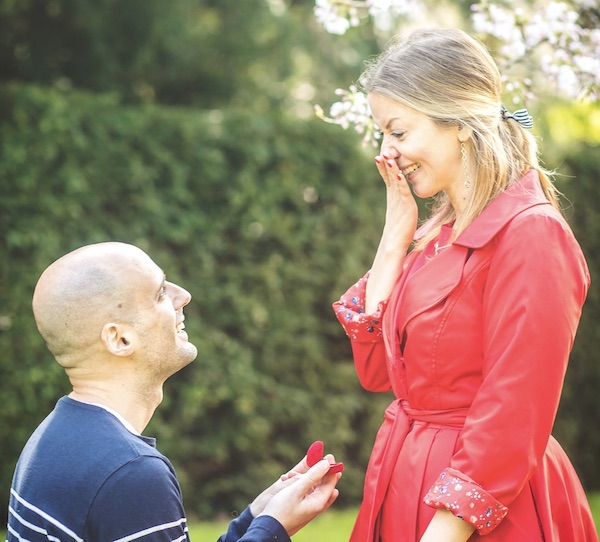

In [9]:
Image(filename = "./proposal.jpg")

## Quantum Circuit Schema

As a bonus, this is the representation of the Quantum Circuit Schema.

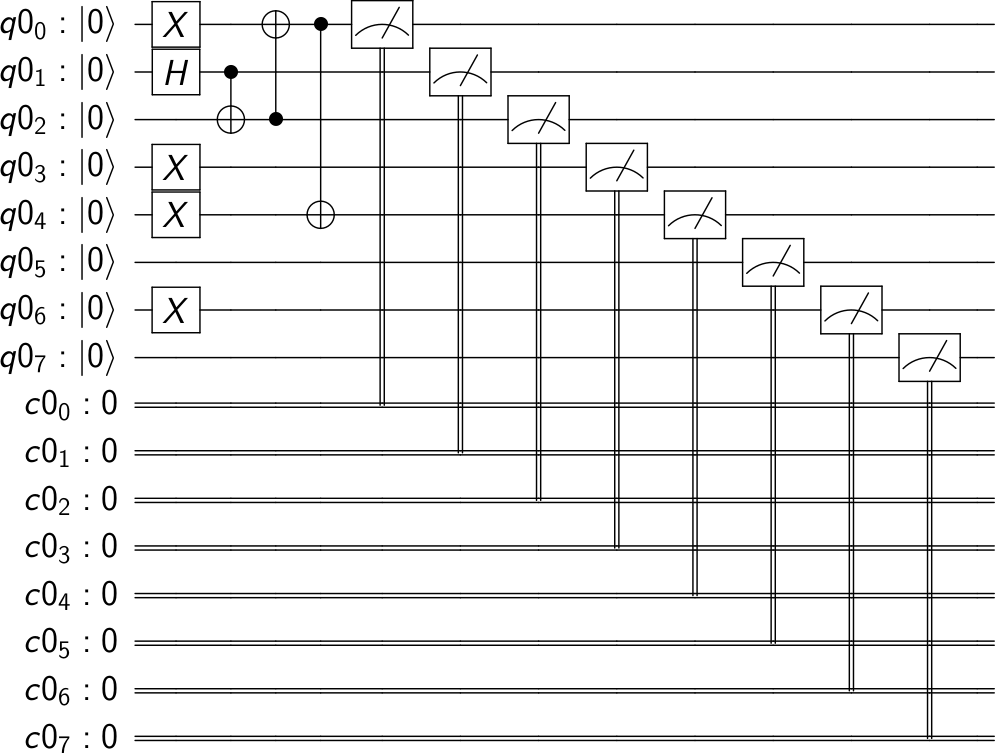

In [10]:
circuit_drawer(qc)

## Credits:

I got the idea from:

- [quantum_emoticon](https://github.com/QISKit/qiskit-tutorial/blob/master/hello_world/quantum_emoticon.ipynb), created by James R. Wootton, University of Basel; Anna Phan, IBM Research.

Thank you IBM for all the amazing resources available in [IBM Q Experience](https://quantumexperience.ng.bluemix.net/qx/experience)!
